In [13]:
import pandas as pd
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statistics
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [14]:

df = pd.read_csv(r"C:\Users\benja\OneDrive\Documents\Classes\Machine Learning\Final Project Fantasy Football\rbdata.csv")
# print("DF before KNN Imputation")
# print(df.describe())
df = df.drop(columns = ['name', 'gp_21', 'projected22', 'owners21', 'team21', 'pos21', 'owned22', 'project20', 'actual21', 'passyd_21', 'passtds21', 'int21', 
                        'runyds21', 'runtds21', 'run1st21', 'rec21', 'recyds21', 'rectds21', 'pass1st21', 'returnyds21', 
                       'returntds21', 'twopoint21', 'fumble21', 'pick21', 'salary21', 'project21', 'returnyds20', 'returntd20',
                       'returnyds19', 'returntd19', 'passyds20', 'passtd20', 'passint20', 'passyds19', 'passtd19', 'passint19'], axis = 1)

# Define the dependent variable and column names
dependent_variable = 'points21'
#print(df[dependent_variable])
column_names = df.columns.tolist()

important_columns = [column_names]

#IMPUTING WITH KNN
# Specify the number of neighbors 
k_neighbors = 2

# Create KNN imputer
knn_imputer = KNNImputer(n_neighbors=k_neighbors)

# Perform imputation
df_knn = knn_imputer.fit_transform(df)

# Convert the NumPy array back to a DataFrame
df = pd.DataFrame(df_knn, columns=df.columns)

# Function to identify outliers using IQR
def find_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Identify outliers for each column
outliers_dict = {}
outliers_dependent_var = find_outliers_iqr(df[dependent_variable])

# # Display the DataFrame without outliers in the dependent variable
# print("DataFrame without outliers in the dependent variable:")
# print(df[~outliers_dependent_var].describe())

# #Print the DataFrame with just the outliers
# print("Outliers")
# print(df[outliers_dependent_var].describe())

#Print a summary of the data after imputing
# print("DF After Imputing")
# print(df.describe())

#DF WITH ALL COLUMNS DROPPED
# df_filled = df.dropna()

# Remove rows with outliers in the dependent variable
df = df[~outliers_dependent_var]

X = df.drop(dependent_variable, axis = 'columns')
Y = df[dependent_variable]

print(df.describe())

#get summary of data and save it to a csv file
# df[important_columns].describe().to_csv('SummaryRaw.csv', index = False)
# df_filled[important_columns].describe().to_csv('SummaryFiltered.csv', index= False)



         points21       gp20    points20    actual20    rushyds20   rushtd20  \
count   73.000000  73.000000   73.000000   73.000000    73.000000  73.000000   
mean   171.889042  13.123288  160.371712  190.547945   525.164384   4.143836   
std     87.370037   3.125590   91.728194  122.939974   359.937360   3.890408   
min     42.330002   2.000000   17.400000    1.000000    34.000000   0.000000   
25%    102.570000  12.000000   81.529999   77.000000   254.000000   1.500000   
50%    153.800000  14.000000  144.285000  185.000000   435.000000   3.000000   
75%    244.170000  16.000000  218.800000  300.000000   691.000000   6.000000   
max    422.230010  16.000000  428.000000  485.000000  2027.000000  17.000000   

       rush1st20  recepts20    recyds20    rectd20  ...   rushtd19  rush1st19  \
count  73.000000  73.000000   73.000000  73.000000  ...  73.000000  73.000000   
mean   28.082192  26.513699  199.013699   1.095890  ...   4.554795  29.958904   
std    19.279921  17.607403  140.644

Correlation Matrix:
           points21      gp20  points20  actual20  rushyds20  rushtd20  \
points21   1.000000 -0.012056  0.465636 -0.448603   0.420613  0.396202   
gp20      -0.012056  1.000000  0.329876 -0.343768   0.210911  0.176704   
points20   0.465636  0.329876  1.000000 -0.943011   0.853364  0.810732   
actual20  -0.448603 -0.343768 -0.943011  1.000000  -0.778445 -0.700134   
rushyds20  0.420613  0.210911  0.853364 -0.778445   1.000000  0.859437   
rushtd20   0.396202  0.176704  0.810732 -0.700134   0.859437  1.000000   
rush1st20  0.422525  0.243445  0.885409 -0.807006   0.977114  0.882446   
recepts20  0.367777  0.291963  0.770420 -0.774957   0.419483  0.417043   
recyds20   0.329159  0.219420  0.755688 -0.742914   0.386538  0.404899   
rectd20    0.012299  0.162778  0.498117 -0.501458   0.136055  0.172496   
rec1st20   0.305211  0.218087  0.724754 -0.702854   0.337218  0.351926   
pt20       0.125175  0.033429  0.363064 -0.255379   0.407142  0.303096   
fumble20   0.27388

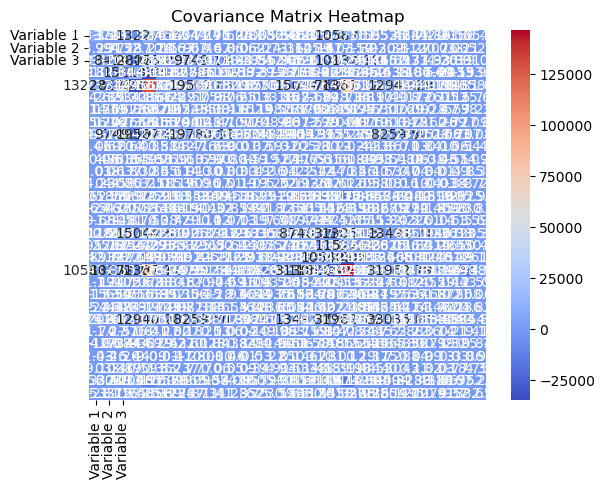

VIF Table:
     Variable         VIF
0        gp20   57.343998
1    points20  348.957055
2    actual20   54.672114
3   rushyds20  250.371171
4    rushtd20   20.489866
5   rush1st20  216.645352
6   recepts20  108.762261
7    recyds20  131.169289
8     rectd20    7.625043
9    rec1st20   58.371023
10       pt20    2.773428
11   fumble20    2.644116
12     pick20   42.497906
13   salary20   15.794467
14       gp19  114.199261
15   points19  706.208776
16   owners20   20.496320
17   actual19   53.567985
18  rushyds19  133.708963
19   rushtd19   28.012993
20  rush1st19  163.870685
21  recepts19  108.037061
22   recyds19  118.437047
23    rectd19    9.076301
24   rec1st19   73.166600
25       pt19    2.399344
26   fumble19    6.476343
27     pick19   27.721821
28   salary19   17.119890


In [15]:

#Calculate the correlation matrix for all the independent variables, then narrow it down to X independent variables
correlation_matrix = df.corr()
correlation_X = df.corr()
print("Correlation Matrix:")
print(correlation_X)

#Calculate the covariance matrix, then narrowed down to X independent variables
numpy = df.to_numpy()
numpy_X = df.to_numpy()
covariance_matrix = np.cov(numpy_X, rowvar=False)
# Create a heatmap of the covariance matrix
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Variable 1', 'Variable 2', 'Variable 3'],
            yticklabels=['Variable 1', 'Variable 2', 'Variable 3'])
# Add labels and title
plt.title('Covariance Matrix Heatmap')
plt.show()

#Calculate the Variance Inflation Matrix(VIF) to find any multicollinearity
important_dfilled = df.drop(dependent_variable, axis = 'columns')
variables = important_dfilled.values
vif_values = [variance_inflation_factor(variables, i) for i in range(important_dfilled.shape[1])]
# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': important_dfilled.columns, 'VIF': vif_values})
print("VIF Table:")
print(vif_df)


In [16]:
#Decision Tree Model
# Test train split and instantiate the DecisionTreeRegressor model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=30)

# Define the parameter grid to search through
param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'poisson', 'absolute_error'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [1,2,3,4,5],
     'ccp_alpha': [0.0, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
}


model = DecisionTreeRegressor()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

#model.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

model = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = model.predict(X)

# Calculate the Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(Y, y_pred_train)
print("Mean Squared Error on Training Data:", mse_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Get the R-squared on the test set
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Best Parameters: {'ccp_alpha': 2.0, 'criterion': 'poisson', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Mean Squared Error: 8876.600432693967
Mean Squared Error on Training Data: 5658.644046387741
Mean Squared Error on Test Data: 8245.351665229555
R-squared: -1.9423641334639825


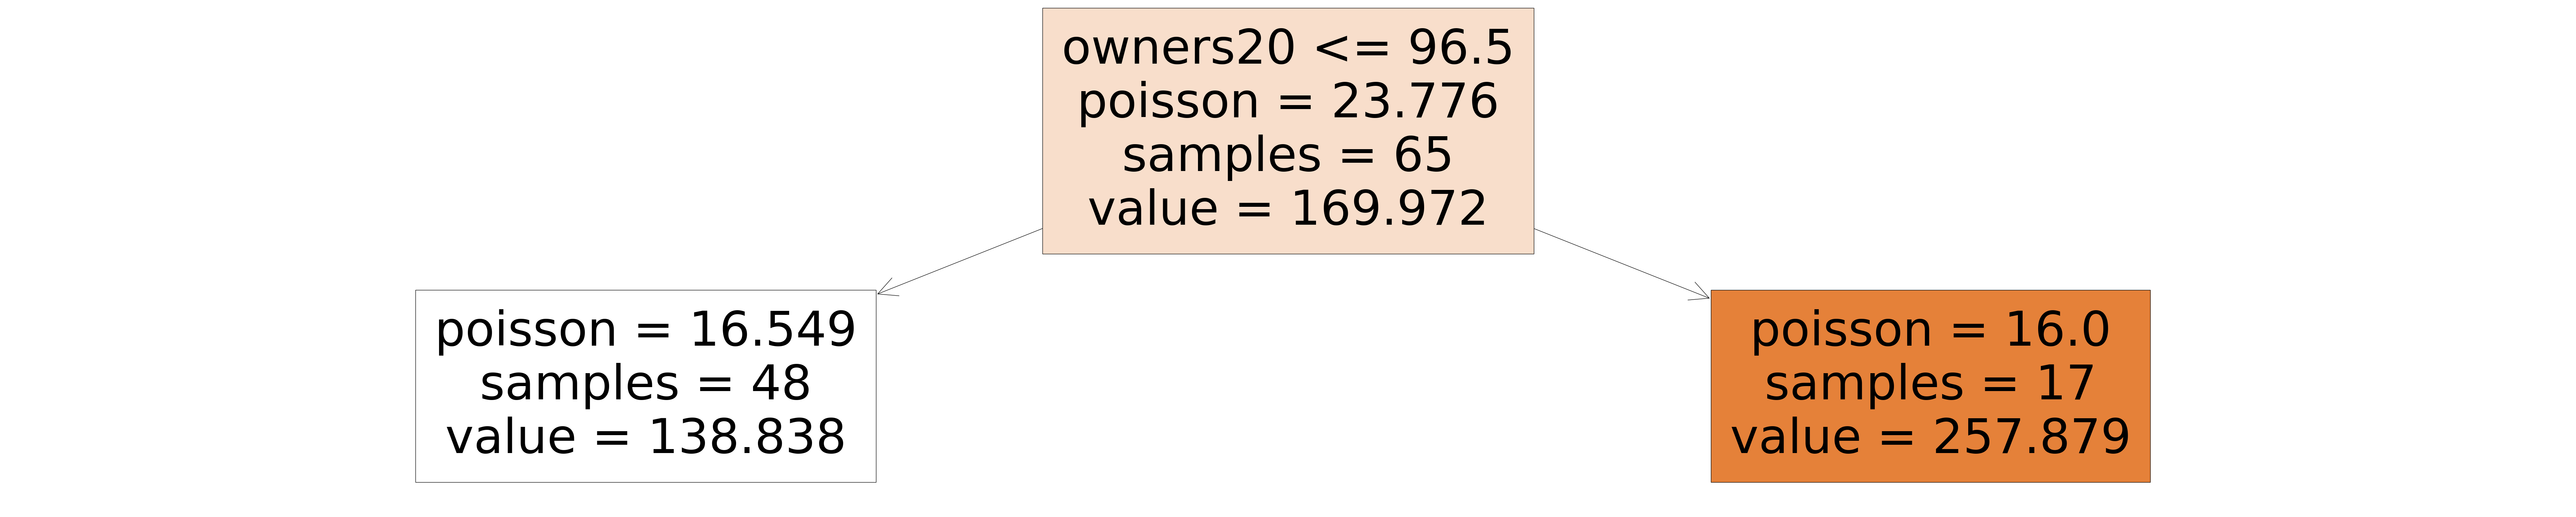

In [17]:
# Display the decision tree
plt.figure(figsize=(100, 20))
plot_tree(model, feature_names = list(X.columns),  filled = True)
plt.show()

In [18]:
#PCA with all variables passed in
X_standardized = StandardScaler().fit_transform(X)
# Create a PCA instance
n = 10
pca = PCA(n_components=n) 
pca.fit(X_standardized)
# Fit the PCA model to the standardized data
principal_components = pca.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['PC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)
#print(pc_df)
# Get the explained variance of each principal component
eigenvalues = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
#final_df = pd.concat([df, pc_df], axis=1) # Add 'target' if available
# print(final_df)

Variance explained by each latent variable in PCA:  [0.38979604 0.18937782 0.10755533 0.04440916 0.03753015 0.03139189
 0.03031762 0.02688043 0.02259264 0.02125765]
   Explained Variance  Cumulative Explained Variance
0           11.461086                      11.461086
1            5.568234                      17.029320
2            3.162425                      20.191746
3            1.305753                      21.497498
4            1.103491                      22.600989
5            0.923009                      23.523998
6            0.891422                      24.415420
7            0.790359                      25.205779
8            0.664286                      25.870065
9            0.625034                      26.495099


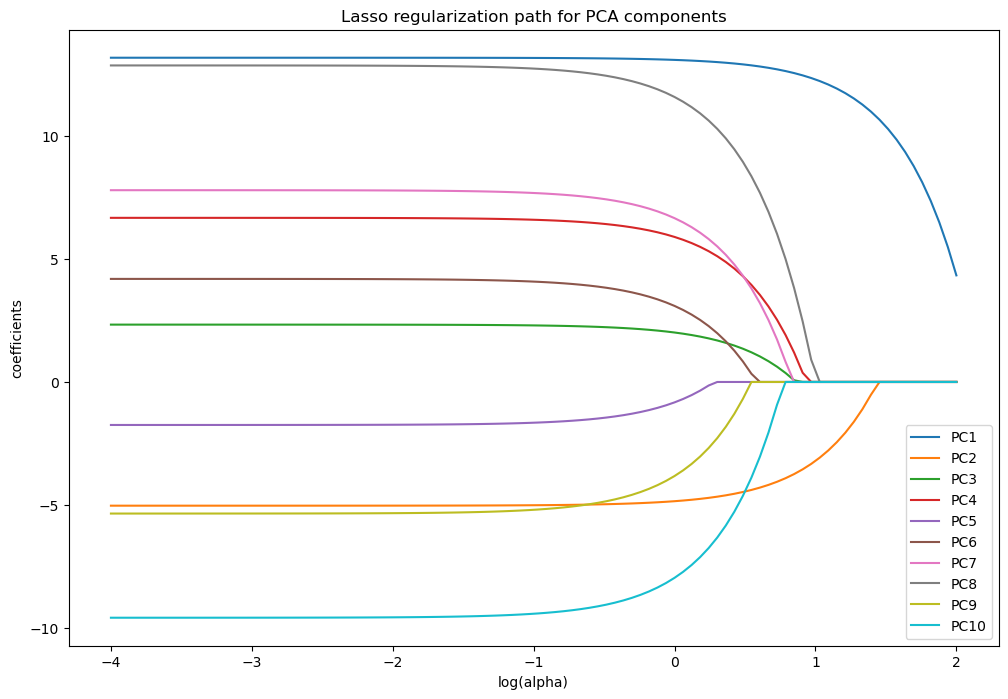

In [19]:
# Choose a range of alpha values
alphas = np.logspace(-4, 2, 100)

# Initialize an array to store coefficients for each alpha
coefs = []

# Fit Lasso for each alpha value
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(principal_components, Y)
    coefs.append(lasso_model.coef_)

# Plot the regularization path
coefs = np.array(coefs)
plt.figure(figsize=(12, 8))

for i in range(coefs.shape[1]):
    plt.plot(np.log10(alphas), coefs[:, i], label=f'PC{i + 1}')

plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso regularization path for PCA components')
plt.legend()
plt.show()

In [20]:
#Lasso model with the PCA components
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(principal_components))  

# Fit the LassoCV model on the data
lasso_cv_model.fit(principal_components, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize an array to store predictions
predictions = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(principal_components):
    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction
    predictions.append(y_pred[0])

# Calculate the mean squared error
mse = mean_squared_error(Y, predictions)

# Calculate R-squared for this alpha
r2 = r2_score(Y, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f}'
equation += ' + '
equation += ' + '.join([f'{coef:.4f} * PC{i + 1}' for i, coef in enumerate(lasso_model.coef_)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse}')
print(f'R-Squared: {r2}')
print(f'Equation: {equation}')

Optimal Alpha: 13.8940
Mean Squared Error (Lasso + LOOCV): 5923.7125218460515
R-Squared: 0.21320915292277276
Equation: y = 172.1663 + 11.9301 * PC1 + -2.7821 * PC2 + 0.0000 * PC3 + 0.0000 * PC4 + -0.0000 * PC5 + 0.0000 * PC6 + 0.0000 * PC7 + 0.0000 * PC8 + -0.0000 * PC9 + -0.0000 * PC10


In [21]:
#Linear Regression with all PCA components
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Training Mean Squared Error: 5471.858365707518
Training R-squared: 0.34284390389588204
Coefficients: [ 15.12838878  -3.1340546    4.86049206   3.88375127  -3.7319438
  -0.           2.98704949  10.34769102  -6.37164896 -15.02957146]
Intercept: 174.78713149577615


In [22]:
#PCA with receptions
rec_columns = ['recepts20', 'recyds20', 'rectd20', 'rec1st20', 'recepts19', 'recyds19', 'rectd19', 'rec1st19']
X_standardized = StandardScaler().fit_transform(X[rec_columns])

# Create a PCA instance
n = 3
pca_rec = PCA(n_components=n) 
pca_rec.fit(X_standardized)
# Fit the PCA model to the standardized data
rec_pc = pca_rec.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['recPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
rec_df = pd.DataFrame(data=rec_pc, columns=pc_columns)

#print(passing_df)
rec_columns_to_add = rec_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_rec.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_rec.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# print(pc_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, rec_df[rec_columns_to_add]], axis=1) 
for column in rec_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.53922334 0.3059999  0.07832709]
   Explained Variance  Cumulative Explained Variance
0            4.373700                       4.373700
1            2.481999                       6.855700
2            0.635320                       7.491019
      points21  gp20    points20  actual20  rushyds20  rushtd20  rush1st20  \
0   243.929990  16.0   68.629997     327.0      169.0       1.0       14.0   
1   322.200010  13.0  197.429990     103.0      721.0       6.0       42.0   
2   324.730010  16.0  181.700000     120.0      232.0       1.0       12.0   
3    73.269997  16.0   63.435001     342.5      252.5       2.0       12.0   
4   164.570010  15.0  241.070010      60.0      642.0       6.0       38.0   
..         ...   ...         ...       ...        ...       ...        ...   
70  109.500000  16.0   63.435001     342.5      252.5       2.0       12.0   
71  244.170000  16.0  397.299990       6.0     2027.0      17.0       98.0   

In [23]:
#PCA with rushing yards
rushing_columns = ['rushyds20', 'rushtd20', 'rush1st20', 'rushyds19', 'rushtd19', 'rush1st19']
X_standardized = StandardScaler().fit_transform(X[rushing_columns])
# Create a PCA instance
n = 2
pca_rushing = PCA(n_components=n) 
pca_rushing.fit(X_standardized)
# Fit the PCA model to the standardized data
rushing_pc = pca_rushing.fit_transform(X_standardized)
# Create column names for principal components
pc_columns = ['rushingPC' + str(i) for i in range(1, n + 1)]

# Create a DataFrame for the principal components
rushing_df = pd.DataFrame(data=rushing_pc, columns=pc_columns)
rushing_columns_to_add = rushing_df.columns.difference(df.columns)

# Get the explained variance of each principal component
eigenvalues = pca_rushing.explained_variance_

# Calculate the cumulative explained variance
cumulative_eigenvalues = np.cumsum(eigenvalues) 

# Create a DataFrame for visualization
eigenvalues_df = pd.DataFrame({'Explained Variance': eigenvalues,
                             'Cumulative Explained Variance': cumulative_eigenvalues})

print ("Variance explained by each latent variable in PCA: ", pca_rushing.explained_variance_ratio_)

# Display the DataFrame
print(eigenvalues_df)

# # Concatenate the principal components with the original DataFrame
df = pd.concat([df, rushing_df[rushing_columns_to_add]], axis=1)
for column in rushing_columns:
    if column in df.columns:
        df.drop(columns = column, inplace=True, axis = 1)
print(df)

Variance explained by each latent variable in PCA:  [0.71995617 0.1949054 ]
   Explained Variance  Cumulative Explained Variance
0            4.379733                       4.379733
1            1.185675                       5.565408
      points21  gp20    points20  actual20  pt20  fumble20  pick20  salary20  \
0   243.929990  16.0   68.629997     327.0   1.0       0.0   169.0       1.0   
1   322.200010  13.0  197.429990     103.0   0.0       0.0    46.0      20.0   
2   324.730010  16.0  181.700000     120.0   0.0       0.0   159.0       1.0   
3    73.269997  16.0   63.435001     342.5   0.0       0.0   176.0       1.0   
4   164.570010  15.0  241.070010      60.0   0.0       1.0   111.5       5.0   
..         ...   ...         ...       ...   ...       ...     ...       ...   
70  109.500000  16.0   63.435001     342.5   0.0       0.0   100.0      23.0   
71  244.170000  16.0  397.299990       6.0   1.0       2.0    25.0      55.0   
72  302.299990  14.0  220.970000      75.0   

In [24]:
handpicked_df = df[['recPC1', 'recPC2', 'recPC3', 'rushingPC1', 'rushingPC2', 'points20', 'points19']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(handpicked_df, Y, test_size=0.2, random_state=42)
# Create a linear regression model
model = Lasso()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [74, 73]

In [ ]:
# Create a LassoCV model with cross-validation
lasso_cv_model = LassoCV(cv=len(handpicked_df), random_state=42)

# Fit the LassoCV model on the data
lasso_cv_model.fit(handpicked_df, Y)

# Get the optimal alpha from LassoCV
optimal_alpha = lasso_cv_model.alpha_

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize arrays to store results
predictions = []
true_values = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(handpicked_df):
    X_train, X_test = handpicked_df.iloc[train_index], handpicked_df.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Create a Lasso model with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha)

    # Fit the Lasso model on the training set
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Store the prediction and true value
    predictions.append(y_pred[0])
    true_values.append(y_test.iloc[0])

# Calculate the mean squared error
mse = mean_squared_error(true_values, predictions)

# Calculate R-squared
r2 = r2_score(true_values, predictions)

# Store the coefficients for the equation
equation = f'y = {lasso_model.intercept_:.4f} + ' + ' + '.join([f'{coef:.4f} * {col}' for coef, col in zip(lasso_model.coef_, handpicked_df.columns)])
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print(f'Mean Squared Error (Lasso + LOOCV): {mse:.4f}')
print(f'R-Squared: {r2:.4f}')
print(f'Equation: {equation}')




In [ ]:

# # Plot y-values against indices
# plt.plot(Y, marker='o')

# # Add labels and title
# plt.xlabel('Index')
# plt.ylabel('Y-values')
# plt.title('One-Dimensional Plot of Y-values')

# # Show the plot
# plt.show()

# # Create scatter plots for each column with respect to the dependent variable
# for column in column_names:
#    plt.figure(figsize=(8, 6))
#    plt.scatter(df[column], df[dependent_variable], alpha=0.5)
#    plt.title(f'Scatter Plot of {column} vs. {dependent_variable}')
#    plt.xlabel(column)
#    plt.ylabel(dependent_variable)
#    plt.grid(True)
# #   plt.savefig(f'plot_{column}.png', dpi=300)
#    plt.show()

In [ ]:
#Create LINEAR REGRESSION MODEL FROM OLS
x = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
# Get the coefficients and variable names
coefficientsOLS = model.params  # Include the intercept
variable_names = X
equation = " + ".join(f"{b:.4f}*{var}" for b, var in zip(coefficientsOLS, variable_names))
print(model.summary())